<a href="https://colab.research.google.com/github/Frorozcoloa/neuromatch_team_2/blob/main/0-1-analisys_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install datasets wordcloud spacy disaggregators
!python -m spacy download en_core_web_lg

2023-07-17 15:30:40.764958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [53]:
# Utilies functions
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud

def create_word_cloud(series):
    # Combine all text from the series into a single string
    text = ' '.join(series.tolist())

    # Load spaCy's English language model
    nlp = spacy.load('en_core_web_sm')

    # Create a set of spaCy's English stop words
    stopwords = set(nlp.Defaults.stop_words)

    # Step 4: Create an instance of WordCloud and generate the word cloud
    wordcloud = WordCloud(stopwords=stopwords).generate(text)

    # Step 6: Display the word cloud using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



def not_none(example):
    return example['body'] is not None

def filter_lenchar(example, max_length=512):
  len_char = len(example["body"])
  if len_char>= max_length:
    is_gt_mt = True
  else:
    is_gt_mt = False
  example["is_gt_mt"] = is_gt_mt
  return example


In [51]:
from datasets import load_dataset
dataset = load_dataset("quocanh34/mental_health_dataset_1")
dataset = dataset.filter(not_none)
dataset = dataset.map(filter_lenchar)

  0%|          | 0/1 [00:00<?, ?it/s]

Filter:   0%|          | 0/151288 [00:00<?, ? examples/s]

Map:   0%|          | 0/149679 [00:00<?, ? examples/s]

In [54]:
df = dataset["train"].to_pandas()

In [55]:
df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url,is_gt_mt
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...,True
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...,True
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...,False
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...,False
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...,False


<Axes: >

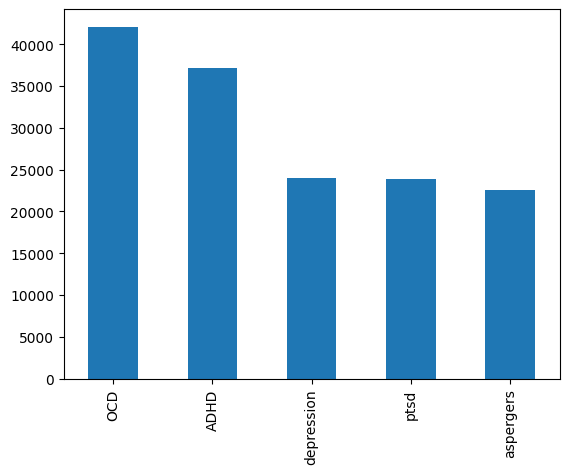

In [56]:
df.subreddit.value_counts().plot.bar()

In [57]:
df.body.isnull().sum()

0

In [58]:
df.title.isnull().sum()

0

In [59]:
df[df.body.isnull()]

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url,is_gt_mt


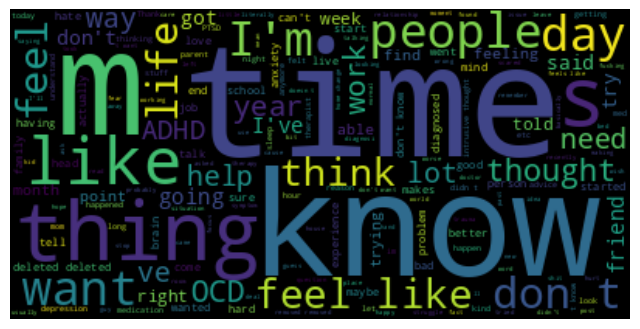

In [60]:
df_plot = df.body.copy()
df_plot.dropna(inplace=True)
create_word_cloud(df_plot)

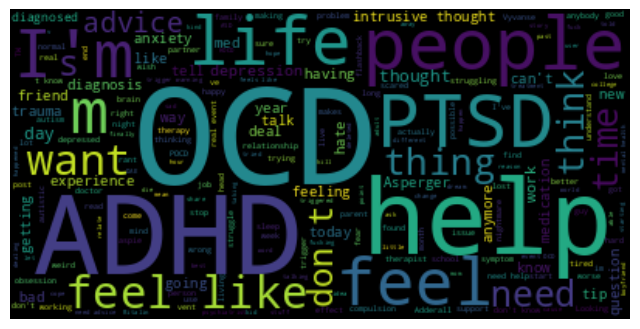

In [61]:
create_word_cloud(df.title)

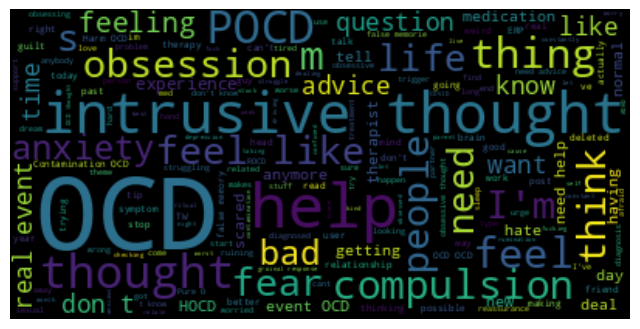

In [62]:
create_word_cloud(df[df.subreddit=="OCD"].title)

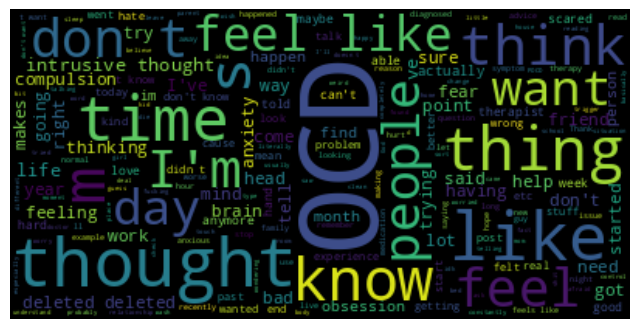

In [63]:
def plot_body(subreddit):
  df_plot = df.copy()
  df_plot = df_plot.dropna()
  create_word_cloud(df_plot[df_plot.subreddit==subreddit].body)
plot_body("OCD")

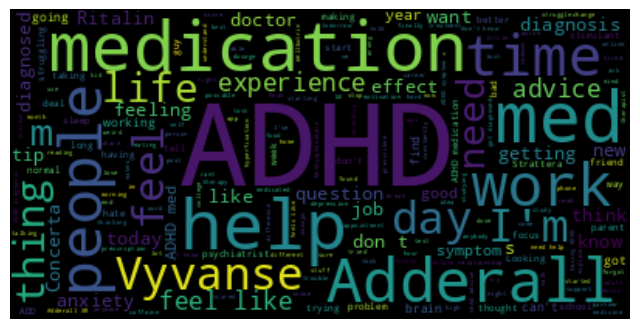

In [64]:
create_word_cloud(df[df.subreddit=="ADHD"].title)

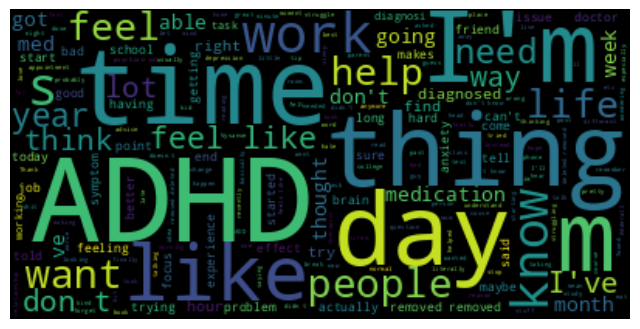

In [65]:
plot_body("ADHD")

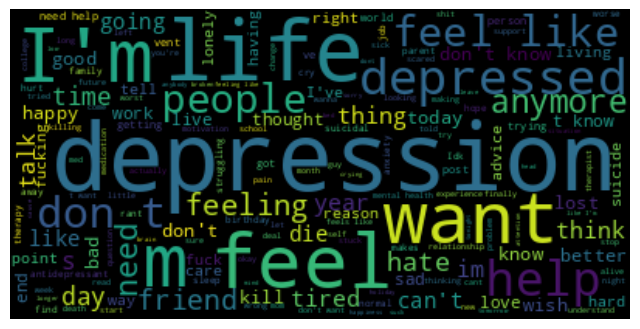

In [66]:
create_word_cloud(df[df.subreddit=="depression"].title)

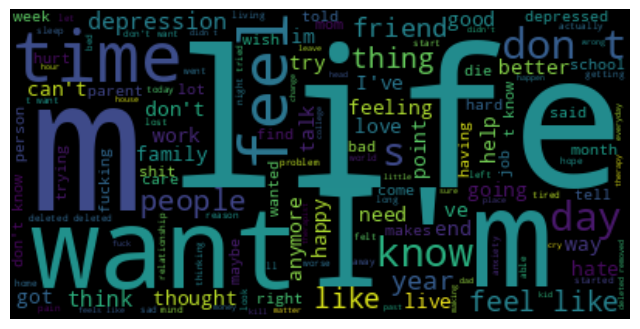

In [67]:
plot_body("depression")

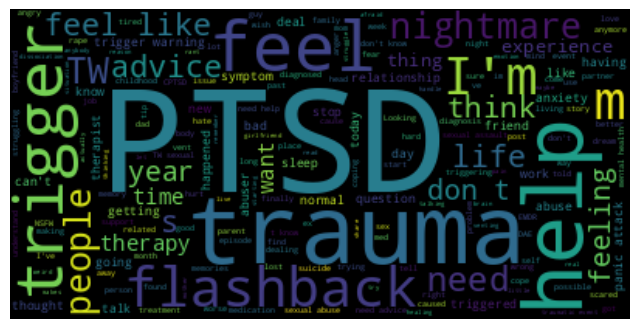

In [68]:
create_word_cloud(df[df.subreddit=="ptsd"].title)

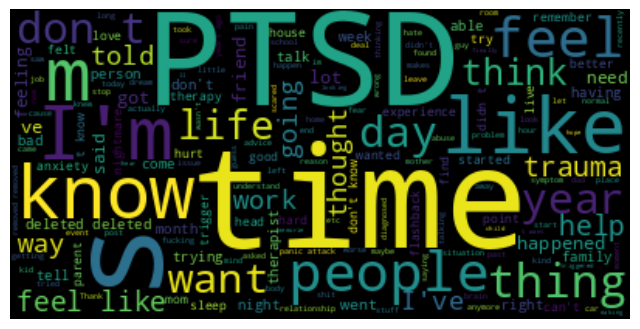

In [69]:
plot_body("ptsd")

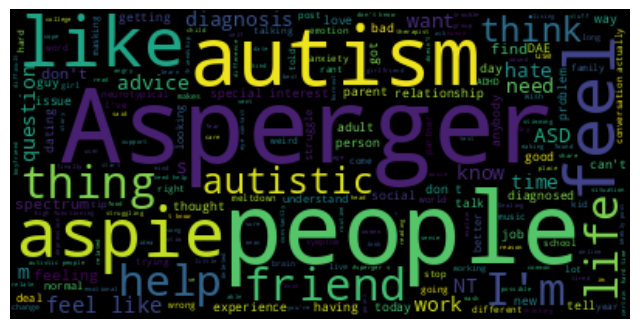

In [70]:
create_word_cloud(df[df.subreddit=="aspergers"].title)

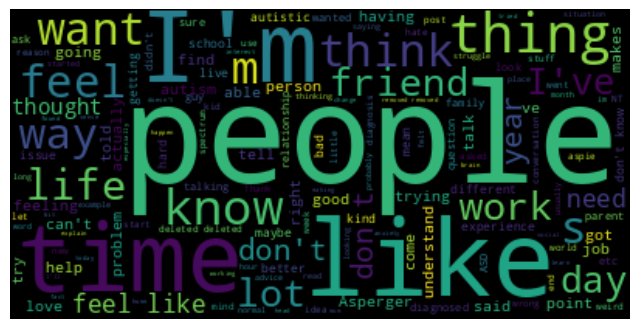

In [71]:
plot_body("aspergers")

In [80]:
df["is_gt_mt"] = pd.Categorical(df["is_gt_mt"])

<Axes: >

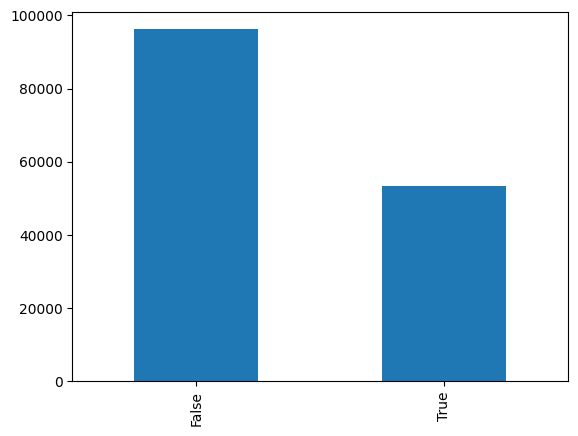

In [87]:
df["is_gt_mt"].value_counts().plot.bar()

(<Figure size 2000x2000 with 3 Axes>,
 {('ADHD', 'True'): (0.0, 0.0, 0.24306263770481903, 0.41409839684814664),
  ('ADHD', 'False'): (0.0,
   0.4174206559843593,
   0.24306263770481903,
   0.5825793440156407),
  ('OCD', 'True'): (0.24796459848913274,
   0.0,
   0.27564216180796847,
   0.3245603155858029),
  ('OCD', 'False'): (0.24796459848913274,
   0.32788257472201554,
   0.27564216180796847,
   0.6721174252779843),
  ('aspergers', 'True'): (0.5285087210814149,
   0.0,
   0.14808160050743877,
   0.33293127649519294),
  ('aspergers', 'False'): (0.5285087210814149,
   0.3362535356314056,
   0.14808160050743877,
   0.6637464643685944),
  ('depression', 'True'): (0.6814922823731674,
   0.0,
   0.15740220018552126,
   0.3225899658124314),
  ('depression', 'False'): (0.6814922823731674,
   0.325912224948644,
   0.15740220018552126,
   0.6740877750513559),
  ('ptsd', 'True'): (0.8437964433430024,
   0.0,
   0.1562035566569976,
   0.3774737233932291),
  ('ptsd', 'False'): (0.8437964433430024,

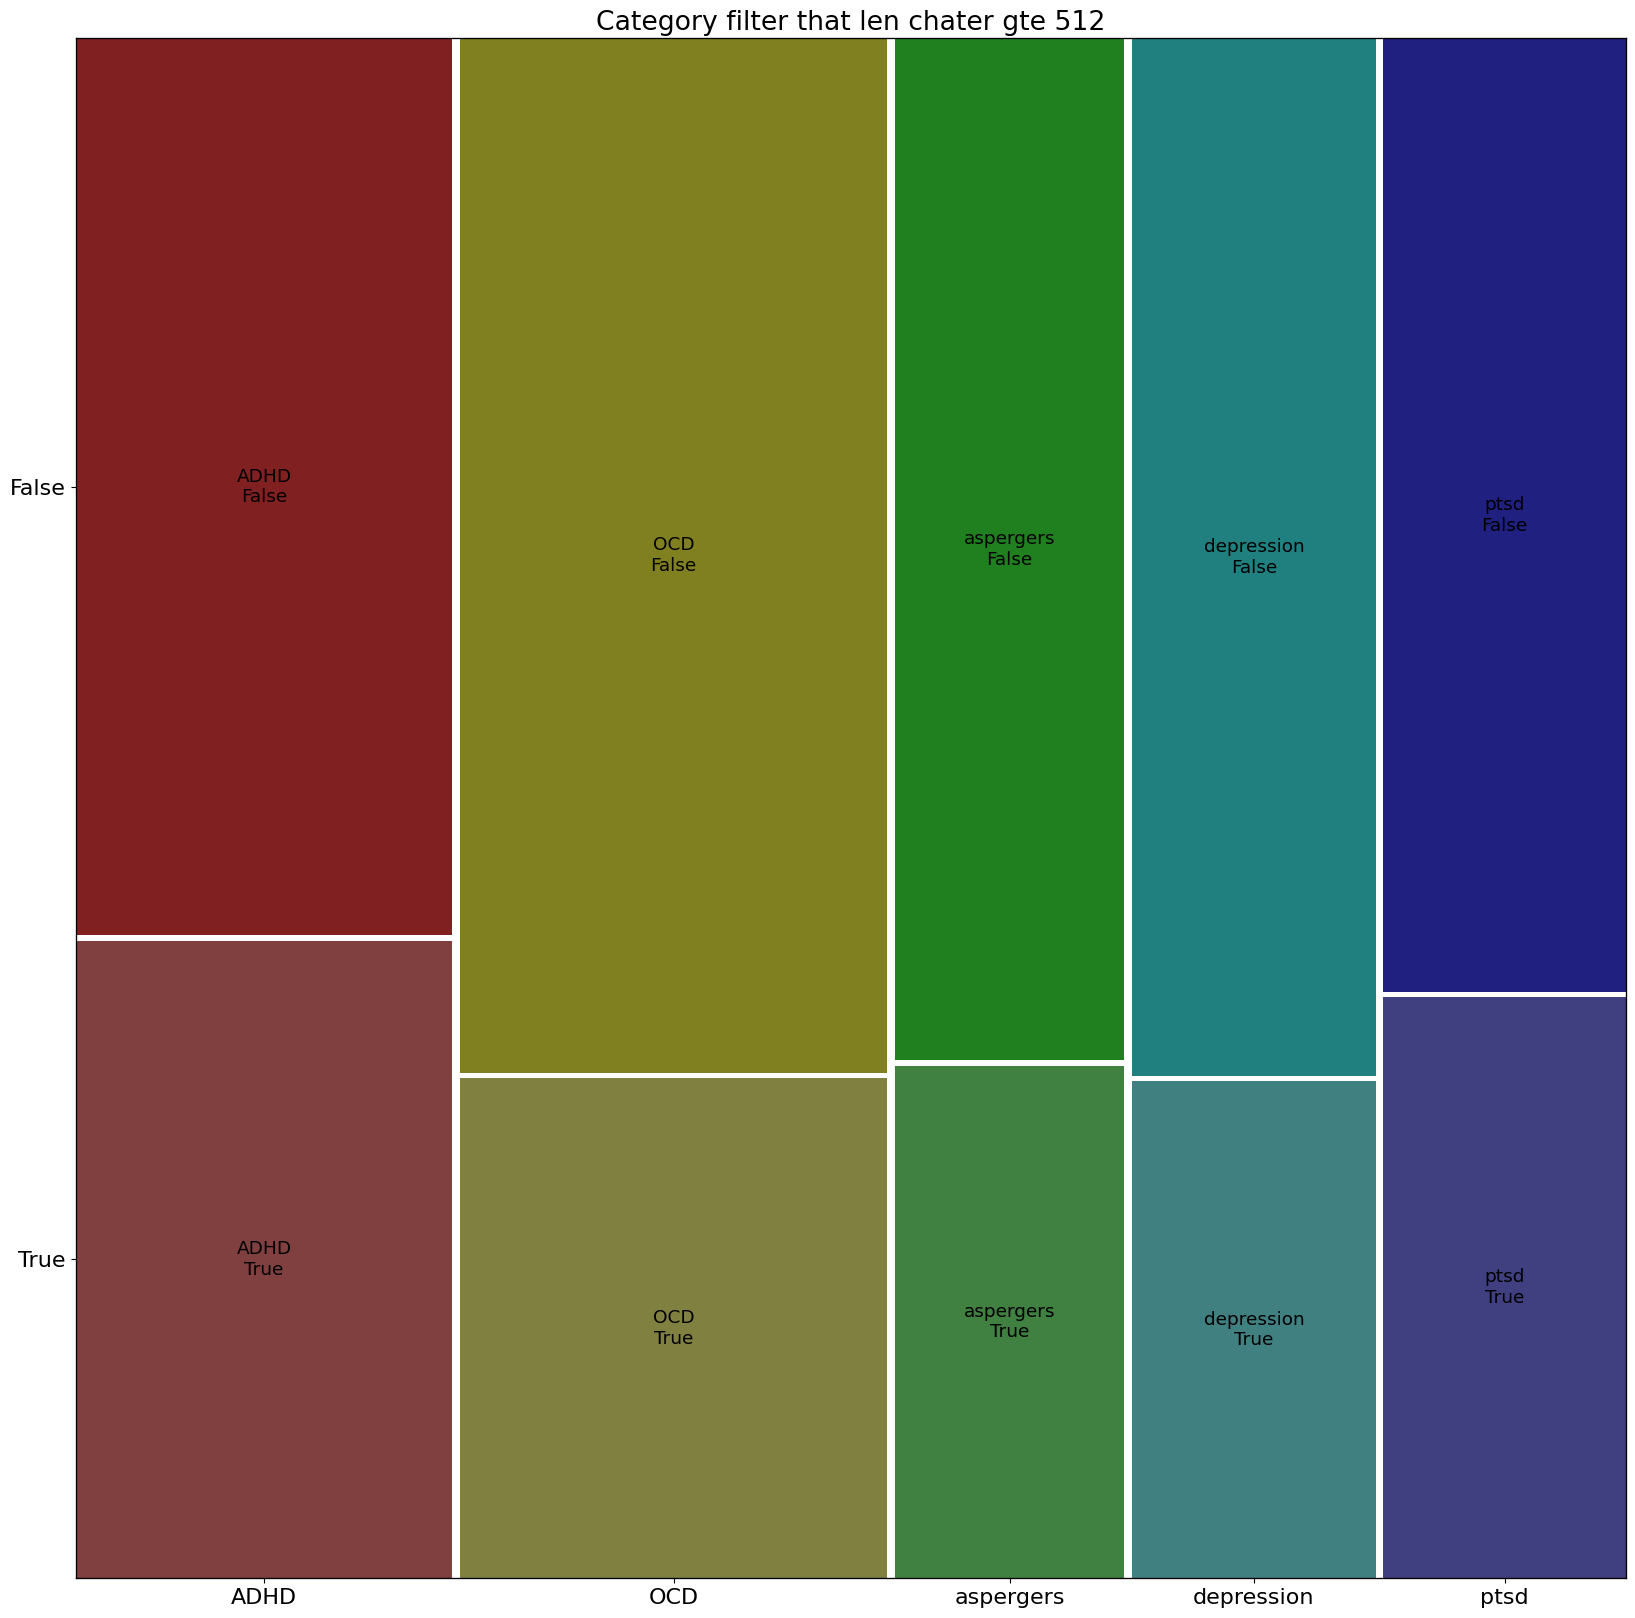

In [94]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
plt.rcParams["figure.figsize"] = (20,20)
mosaic(df, ['subreddit', 'is_gt_mt'],  title='Category filter that len chater gte 512')

#  Disaggregator
I uses this library to see the bias in the dataset